# Linear Regression
## Machine Learning
---
Machine learning, a subset of data science, is the scientific study of __computational algorithms__ and __statistical models__ to perform specific tasks through patterns and inference without explicit instructions. Machine learning can be described as a set of tools to build models on data. Data science heavily involves:
- building model
- understand data
- make predictions

### Supervised and Unsupervised learning
Supervised learning is when we have a known target (also called label) based on past data and unsupervised learning is when there isn't a known past answer. 
\
Linear regression is a supervised learning algorithm. Another supervised one is classification. An example of unsupervised learning is clustering. 

### Scikit-learn
Workflow: __import -> instantiate -> fit -> predict__
\
Below is an example of predicting house prices in Boston, USA with linear regression.

### Linear Regression
Linear regression is a supervised learning model, which fits a straight line to data mathematically.

> y = b + m*x

where b is the __(y-)intercept__ and m is the __slope__, x is a __feature__ or input, whereas y is __label__ or output. Linear regression is to find the `b` and `m` so that errors are minimised. Essentially, linear regression is to find the line where it minimises the sum of the squared residuals. 

## Exploratory Data Analysis
---
> The Boston housing dataset is our sample dataset that provides median values of homes in different areas around Boston. Along with the median home values in $1000 (MEDV), crime (CRIM), nitric oxides concentration (NOX), the average number of rooms (RM), percentage of lower status of the population (LSTAT), and other features are provided. Our objective is to predict median home price (MEDV), the target in this scenario, using some features provided.

In [5]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [67]:
boston['MEDV'] = boston_dataset.target

In [68]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston.shape, boston.columns

((506, 14),
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object'))

In [10]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Histograms
Histograms reveal the distribution of numeric values.

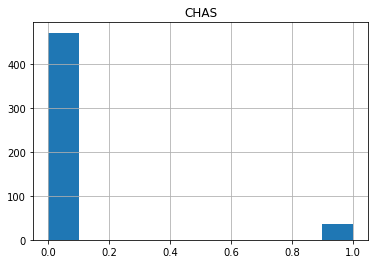

In [19]:
boston.hist(column='CHAS')
plt.show()

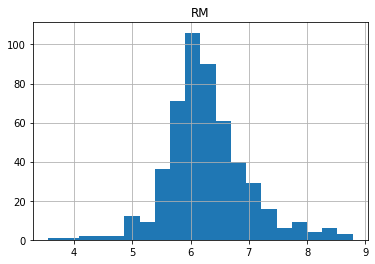

In [20]:
boston.hist(column='RM', bins=20)
plt.show()

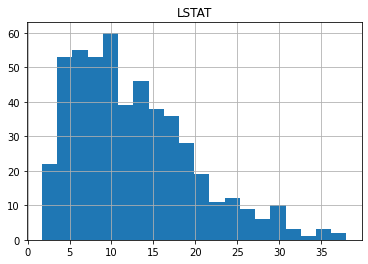

In [21]:
boston.hist(column='LSTAT', bins=20)
plt.show()

## Correlation
---
### Correlation matrix
Correlation measures linear relationships between variables. Use `.corr` to construct a correlation matrix, which possess the following features:
- each element ranging from -1 to 1, where 1 (resp. -1) represents a strong positive (negative) correlation between the two variables.
- symmetry

In [22]:
corr_matrix = boston.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


MEDV is the target. The purpose is to predict MEDV using other features.

In [32]:
corr_matrix.loc[['MEDV'], :'LSTAT']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,-0.39,0.36,-0.48,0.18,-0.43,0.7,-0.38,0.25,-0.38,-0.47,-0.51,0.33,-0.74


### Selecting features
---
As above result shows a strong positive correlation between RM and MEDV, further exploration is required.

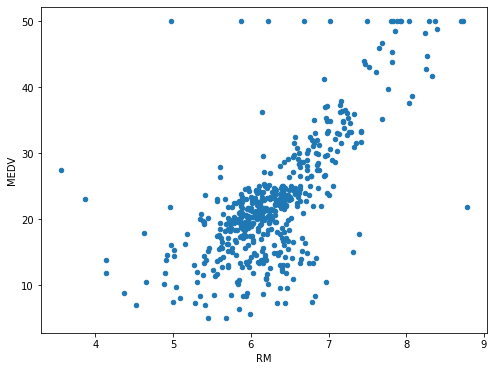

In [26]:
boston.plot(kind='scatter',
            x='RM',
            y='MEDV',
            figsize=(8, 6))  # in inches
plt.show()

Other features does not present a strong linear correlation.

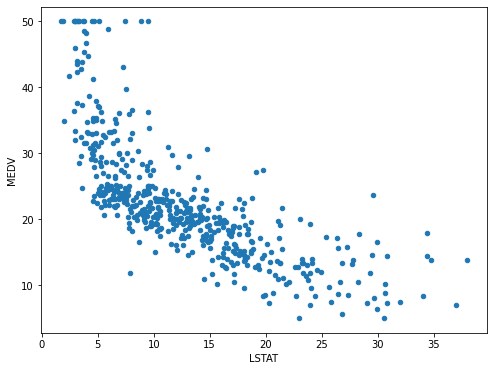

In [27]:
boston.plot(kind='scatter',
            x='LSTAT',
            y='MEDV',
            figsize=(8, 6))
plt.show()

### Preparing data

In [29]:
X = boston[['RM']]
Y = boston['MEDV']
print(X.shape, Y.shape)

(506, 1) (506,)


Scikit-learn requires X and Y. X needs to be a dataframe in 2 dimension. Y is the 1 dimension target array.

## Fitting a Univariate Linear Regression
---
### Instantiating the model
In scikit-learn, every __class of model__ is represented by a class of python. First, initiate an __instance__ of the class.

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Train-test split
Split data into train and test sets to assign the performance of the model on unseen data. Use traning set to train the model, and save the testing set for evaluation. Usually, split data 70-30 for train-test. 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=.3,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((354, 1), (152, 1), (354,), (152,))

### Fitting the model
In short, fitting is training. It fits the model to the training data and finds the coefficients specified in the linear regression model, i.e. intercept and slope. After it is trained, it can be used to make predictions.

In [36]:
model.fit(X_train, Y_train)

LinearRegression()

### Parameter estimates
The model is fitted so the intercept and the slope have been learned. _In scikit-learn, by conversion all model parameters have one trailing underscore._

In [37]:
model.intercept_.round(2)

-30.57

In [38]:
model.coef_.round(2)

array([8.46])

Full code is as follow:
```
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = boston[['RM']]
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
  test_size = 0.3,
  random_state=1)
model = LinearRegression()
model.fit(X_train, Y_train)
model.intercept_.round(2)
model.coef_.round(2)
```

### Prediction
Once the model is trained, supervised machine learning will evaluate test data based on previous predictions for the unseen data. Use `.predict()` method.

In [41]:
new_rm = np.array([6.5]).reshape(-1, 1)
model.predict(new_rm)

array([24.42606323])

_Input is always 2 dimensional, whereas output is always 1 dimensional._

The underlying computing is as follow

In [42]:
model.intercept_ + model.coef_ * 6.5

array([24.42606323])

Test with reserved test set. The predicted result have the same shape as test set outputs.

In [44]:
y_test_predicted = model.predict(X_test)
y_test_predicted.shape == Y_test.shape

True

## Evaluating the model
---
### Residuals
One way is to visually examine the model by plotting the line with scatter graph.

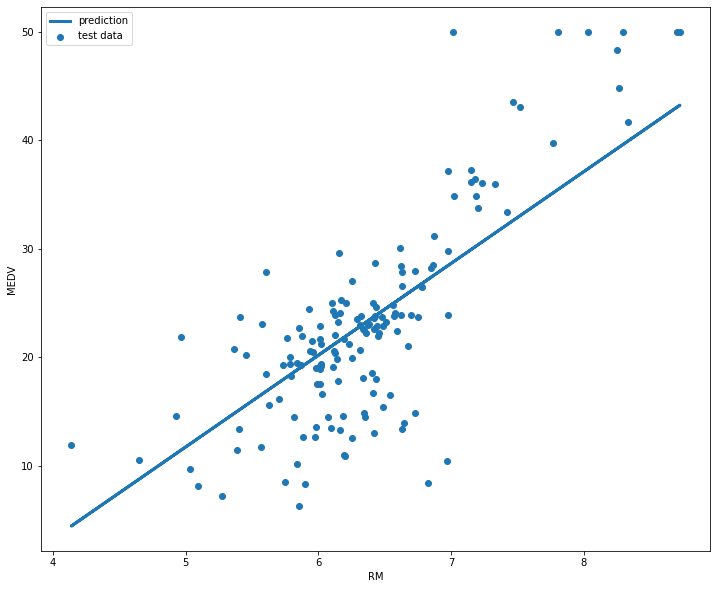

In [49]:
plt.figure(figsize=(12, 10))
plt.scatter(X_test, Y_test, label='test data')
plt.plot(X_test, y_test_predicted, label='prediction', linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

The distance between a point and the line along the vertical axis is called the __residual__ or error. It is the difference between the predicted value and the obsered value of the target. The smaller the residual, the better the model.

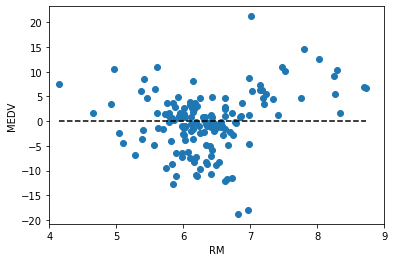

In [52]:
residuals = Y_test - y_test_predicted

# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y=0,
           xmin=X_test.min(),
           xmax=X_test.max(),
           color='k',
           linestyle='--')
# set x limit
plt.xlim((4, 9))
# set axis label
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

__Random distribution and symmetry indicates that the model works.__

### Mean squared error

Residuals can be positive and negative, so they could cancel out each other when calculating the average.
Squaring them first resolves the problem. Mean squared error (MSE) is taking the square of residuals and average them.

In [54]:
(residuals**2).mean()

36.517214730838624

Scikit-learn provides a convenient function for this.

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_test_predicted)

36.517214730838624

In [63]:
print('The test data range from',
      Y_test.min(),
      'to',
      Y_test.max(),
      'with a variance of',
      Y_test.var(),
      end='.\n')

The test data range from 6.3 to 50.0 with a variance of 92.26147046009062.


### R-squared
Another common metric to measure performance is r-squared, which can be caculated with `.score()`.

In [64]:
model.score(X_test, Y_test)

0.6015774471545622

It is the proportion of total variantion explained by the model. The total variation is calculated as the sum of squares of the difference between the response and the mean of response.
> ((Y_test-Y_test.mean())**2).sum()
\
\# 13931.482039473683

Whereas the variation the model fails to capture is computed as the sum of squares of residuals.
>(residuals**2).sum()
\
\# 5550.6166390874705

The proportion of total variation explained is:
>1-5550.6166390874705/13931.482039473683
\
\# 0.6015774471545623

Evaluating R-squared and value in conjunction with residual plots quantifies model performance.

## Multivariate Linear Regression
---
LSTAT is negatively correlated to MEDV (home price). To take into account both LSTAT and RM, build a __multivariate linear regression model__. 
> MEDV = b0 + b1 * RM + b2 * LSTAT

To find intercept _b0_ and coefficients _b1_ and _b2_, prepare a new set of data.

In [71]:
X2 = boston[['RM', 'LSTAT']]
Y = boston['MEDV']
X2_train, X2_test, Y_trian, Y_test = train_test_split(X2, Y,
                                                      test_size=.3,
                                                      random_state=1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)

LinearRegression()

In [73]:
model2.intercept_, model2.coef_

(5.3168184710960595, array([ 4.12674118, -0.67762654]))

Therefore, the model implies
> MEDV = 5.3168184710960595 + 4.12674118 * RM - 0.67762654 * LSTAT

In [74]:
y_test_predicted2 = model2.predict(X2_test)

### Comparing models

In [81]:
mean_squared_error(Y_test, y_test_predicted).round(2)

36.52

In [83]:
mean_squared_error(Y_test, y_test_predicted2).round(2)

28.93

In [82]:
model.score(X_test, Y_test)

0.6015774471545622

In [84]:
model2.score(X2_test, Y_test)

0.6843090583339466

In general, the more features the model includes the lower the MSE would be. Yet be careful about including too many features. Some features could be random noise, thus hurt the interpretability of the model.